In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nelgiriyewithana/australian-vehicle-prices

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices
License(s): other
  0% 0.00/582k [00:00<?, ?B/s]
100% 582k/582k [00:00<00:00, 65.4MB/s]


In [ ]:
!unzip australian-vehicle-prices.zip

Archive:  australian-vehicle-prices.zip
  inflating: Australian Vehicle Prices.csv  


**This Project is based on The australian Vehical price available from Kaggle repository** (https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices).
It contains the details of 16734 Cars in Australia.
My project task is to create a machine learning model which can predict the price of a car based on its characteristics.
For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.

**Importing required python packages and modules




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV File

In [ ]:
df1=pd.read_csv(r'/content/drive/MyDrive/Australian Vehicle Prices.csv')

In [ ]:
print('Shape before deleting duplicate values:', df1.shape)

Shape before deleting duplicate values: (16734, 19)


Removing Any Duplicates if There is any

In [ ]:
# Removing duplicate rows if any
df1=df1.drop_duplicates()
print('Shape After deleting duplicate values:', df1.shape)

Shape After deleting duplicate values: (16734, 19)


Getting the infos about every columns and their data types

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [ ]:
df1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


Brand: Name of the car manufacturer

Year: Year of manufacture or release

Model: Name or code of the car model

Car/Suv: Type of the car (car or suv)

Title: Title or description of the car

UsedOrNew: Condition of the car (used or new)

Transmission: Type of transmission (manual or automatic)

Engine: Engine capacity or power (in litres or kilowatts)


FuelType: Type of fuel (petrol, diesel, hybrid, or electric)

FuelConsumption: Fuel consumption rate (in litres per 100 km)

Kilometres: Distance travelled by the car (in kilometres)

ColourExtInt: Colour of the car (exterior and interior)

Location: Location of the car (city and state)

CylindersinEngine: Number of cylinders in the engine

BodyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)

Doors: Number of doors in the car

Seats: Number of seats in the car

Price: Price of the car (in Australian dollars)




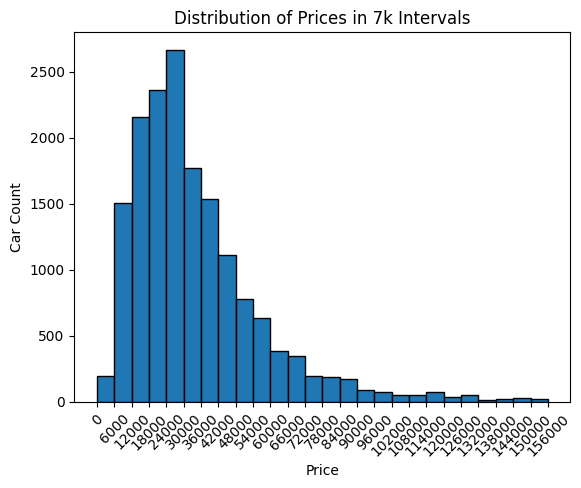

In [ ]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and 'Price' column is already numeric
bins = range(0, 160000, 6000)  # Creating bins from 0 to 150k with 5k intervals

# Convert 'Price' column to numeric if it's not already
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')

plt.hist(df1['Price'], bins=bins, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Car Count')
plt.title('Distribution of Prices in 7k Intervals')
plt.xticks(bins, rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Observations from the histogram
* The data distribution of the target variable is satisfactory to proceed further.
* There are sufficient number of rows for each type of values to learn from.
Observations


In [ ]:
df1.nunique()

,0
Brand,76
Year,45
Model,781
Car/Suv,618
Title,8804
UsedOrNew,3
Transmission,3
Engine,106
DriveType,5
FuelType,9


The column which have less than 20 unique values is the catagorial value.
Others are continious values

In [ ]:
df1.drop(['Title','ColourExtInt','Model','Car/Suv'],axis=1)

,Brand,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990.0
1,MG,2022.0,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990.0
2,BMW,2022.0,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988.0
3,Mercedes-Benz,2011.0,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990.0
4,Renault,2022.0,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,USED,Automatic,-,Front,Unleaded,-,66000,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500.0
16730,Mercedes-Benz,2012.0,USED,Automatic,-,Rear,Diesel,-,117432,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888.0
16731,Suzuki,2022.0,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280.0
16732,Mercedes-Benz,2016.0,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888.0


Here we are Dropping the title, ExtIntColour and car/suv column because we gonna predidict price of the car ased on other character


We are dropping all the null rows so that we can get a clean dataset

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.isnull()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16731,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16732,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Checking the percentage of the null value in each column

In [ ]:
print("Percentage of data missing from each column")
df1.isnull().sum()/len(df1)*100

Percentage of data missing from each column


,0
Brand,0.0
Year,0.0
Model,0.0
Car/Suv,0.0
Title,0.0
UsedOrNew,0.0
Transmission,0.0
Engine,0.0
DriveType,0.0
FuelType,0.0


Checking the count of the null value in each column

In [ ]:
df1.isnull().sum()

,0
Brand,0
Year,0
Model,0
Car/Suv,0
Title,0
UsedOrNew,0
Transmission,0
Engine,0
DriveType,0
FuelType,0


In the next 3 steps, we going to convert the data type so that we can work with them. Because some datatypes ar object , but we need them into the float or integer type

In [ ]:
# Handle non-numeric parts of 'CylindersinEngine', 'Doors', and 'Seats' columns before filling NaNs
# Convert columns to string type if they are not already
df1['CylindersinEngine'] = df1['CylindersinEngine'].astype(str).str.extract('(\d+)').astype(float) # Extract numeric part
df1['Doors'] = df1['Doors'].astype(str).str.extract('(\d+)').astype(float) # Extract numeric part
df1['Seats'] = df1['Seats'].astype(str).str.extract('(\d+)').astype(float) # Extract numeric part
# Fill missing values
df1['Engine'].fillna(df1[~df1['Engine'].isnull()]['Engine'].mode()[0],inplace=True)
df1['FuelConsumption'].fillna(df1[~df1['FuelConsumption'].isnull()]['FuelConsumption'].mode()[0],inplace=True)
df1['CylindersinEngine'].fillna(df1[~df1['CylindersinEngine'].isnull()]['CylindersinEngine'].mode()[0],inplace=True)
df1['Doors'].fillna(df1[~df1['Doors'].isnull()]['Doors'].mode()[0],inplace=True)
df1['Seats'].fillna(df1[~df1['Seats'].isnull()]['Seats'].mode()[0],inplace=True)

In [ ]:
# Convert 'FuelConsumption' to string type before using .str.extract()
df1['FuelConsumption'] = df1['FuelConsumption'].astype(str)

# Now extract numeric part
df1['FuelConsumption'] = df1['FuelConsumption'].str.extract('(\d+\.\d+|\d+)').astype(float) # Extract numeric part

In [ ]:
# Handle non-numeric parts of 'Engine' column before filling NaNs
df1['Engine'] = df1['Engine'].astype(str).str.extract('(\d+\.\d+|\d+)').astype(float) # Extract numeric part

# Fill missing values
df1['Engine'].fillna(df1[~df1['Engine'].isnull()]['Engine'].mode()[0],inplace=True)

# Now you can convert to float
df1['Engine'] = df1['Engine'].astype(float)
df1['FuelConsumption'] = df1['FuelConsumption'].astype(float) # This should now work
df1['CylindersinEngine']=df1['CylindersinEngine'].astype(int)
df1['Kilometres'] = df1['Kilometres'].replace('-', np.nan).astype(float)
df1['Doors'] = df1['Doors'].astype(int)
df1['Seats'] = df1['Seats'].astype(int)
df1['Price'] = df1['Price'].astype(float)

In [ ]:
df1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,4.0,AWD,Diesel,8.7,5595.0,White / Black,"Caringbah, NSW",4,SUV,4,7,51990.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,4.0,Front,Premium,6.7,16.0,Black / Black,"Brookvale, NSW",4,Hatchback,5,5,19990.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,4.0,Rear,Premium,6.6,8472.0,Grey / White,"Sylvania, NSW",4,Coupe,2,4,108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,8.0,Rear,Premium,11.0,136517.0,White / Brown,"Mount Druitt, NSW",8,Coupe,2,4,32990.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,4.0,Front,Unleaded,6.0,1035.0,Grey / Black,"Castle Hill, NSW",4,SUV,4,5,34990.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14551 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14551 non-null  object 
 1   Year               14551 non-null  float64
 2   Model              14551 non-null  object 
 3   Car/Suv            14551 non-null  object 
 4   Title              14551 non-null  object 
 5   UsedOrNew          14551 non-null  object 
 6   Transmission       14551 non-null  object 
 7   Engine             14551 non-null  float64
 8   DriveType          14551 non-null  object 
 9   FuelType           14551 non-null  object 
 10  FuelConsumption    14551 non-null  float64
 11  Kilometres         14454 non-null  float64
 12  ColourExtInt       14551 non-null  object 
 13  Location           14551 non-null  object 
 14  CylindersinEngine  14551 non-null  int64  
 15  BodyType           14551 non-null  object 
 16  Doors              14551 no

In [ ]:
df1[['Engine','FuelConsumption','Kilometres','Price']].describe()

,Engine,FuelConsumption,Kilometres,Price
count,14551.000000,14551.000000,14454.000000,14551.000000
mean,4.421483,7.736403,100096.712329,34980.246306
std,1.102264,2.211181,78140.372463,29031.113506
min,0.000000,0.000000,1.000000,88.000000
25%,4.000000,6.600000,41074.000000,18990.000000
50%,4.000000,7.600000,85052.000000,28990.000000
75%,4.000000,8.800000,146705.500000,42755.000000
max,12.000000,27.000000,526162.000000,649880.000000


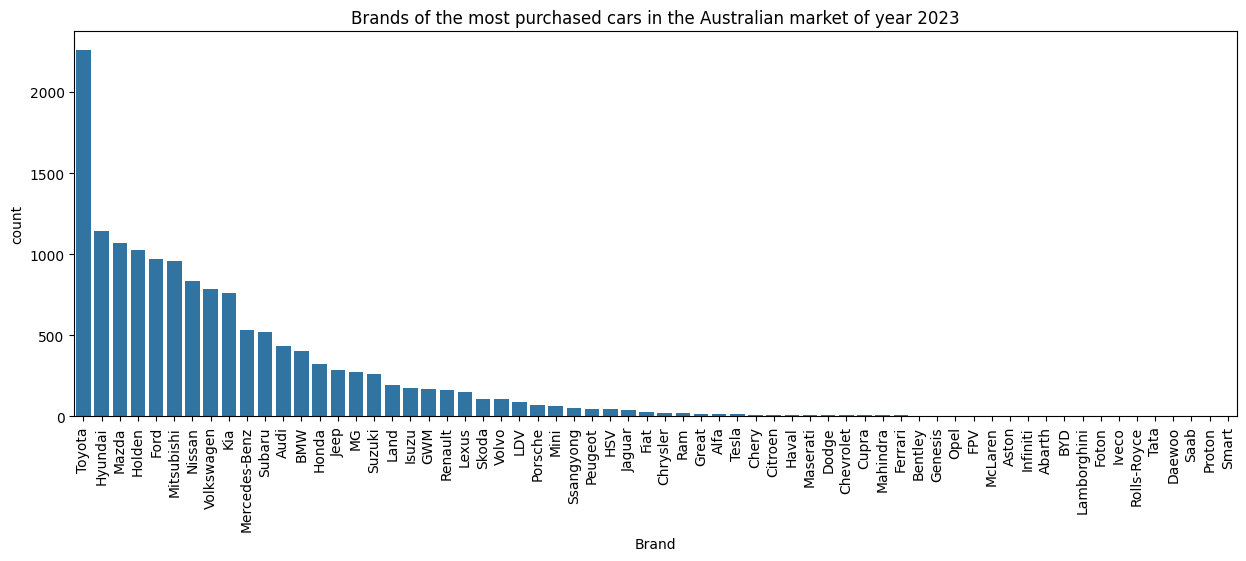

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df1, x='Brand',order=df1['Brand'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Brands of the most purchased cars in the Australian market of year 2023');

The above countplot shows that the brand which had the highest sales in the Australian market in the year 2023 is Toyota, followed by Hyundai, Mazda, Holden and Ford. The brand of the vehicle having the least sales is Smart.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometres'}>],
       [<Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'FuelConsumption'}>]], dtype=object)

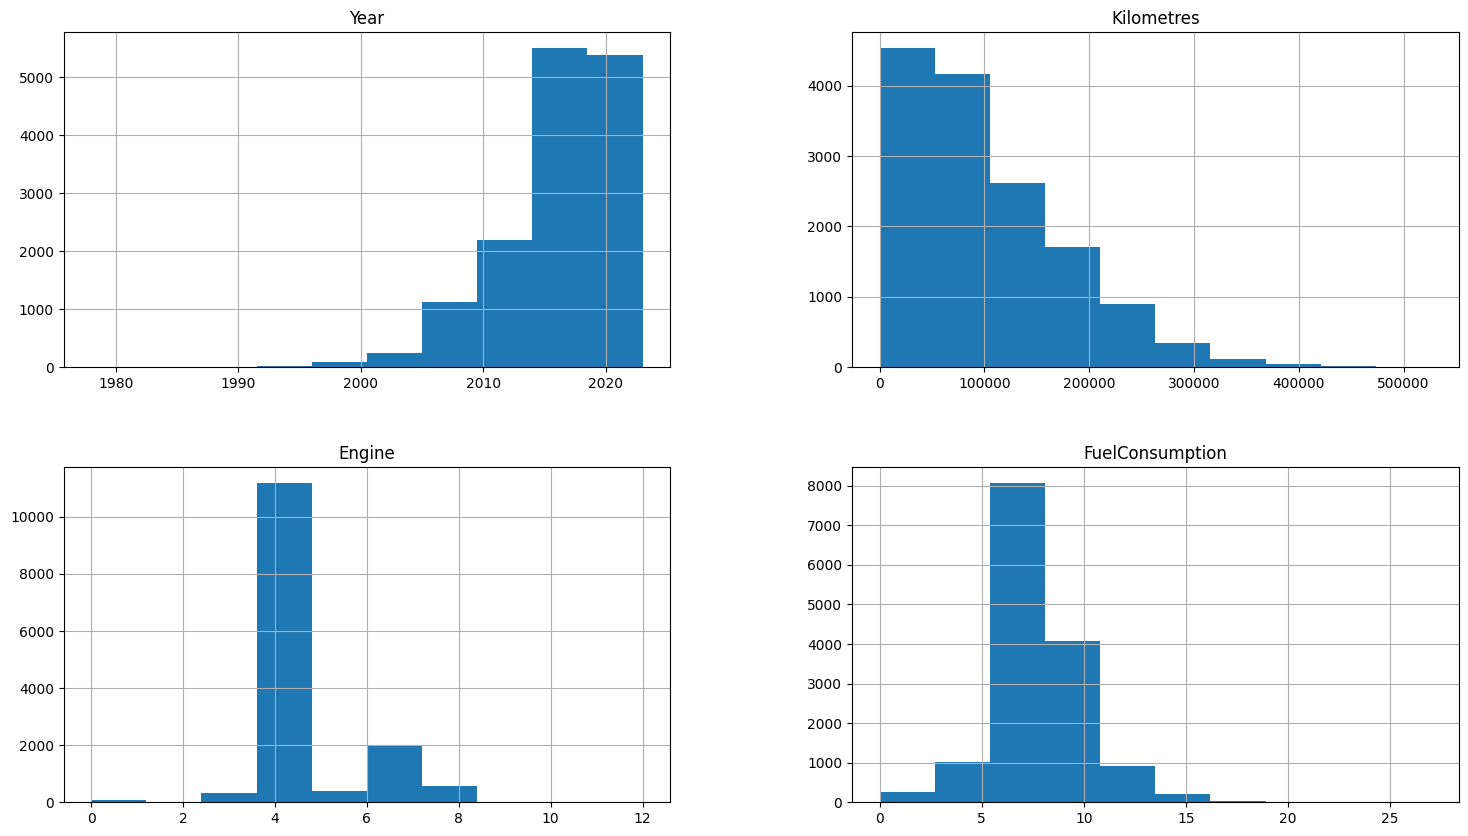

In [ ]:
df1.hist(['Year','Kilometres','Engine','FuelConsumption' ], figsize=(18,10))

#Outlier Analysis
1.  Year:Selected. The distribution is not good.
2.  Kilometers : The distribution is good.
3.  FuelConsumption : The distribution is good.
4.  Engine:We are working with this as Well




# Feature Selection (Attribute Selection)
For this dataset, the Target variable is Continuous, hence following two scenarios will need attention


1.   Continuous Target Variable Vs Continuous Predictor
2.   Continuous Target Variable Vs Categorical Predictor


<Figure size 1000x400 with 0 Axes>

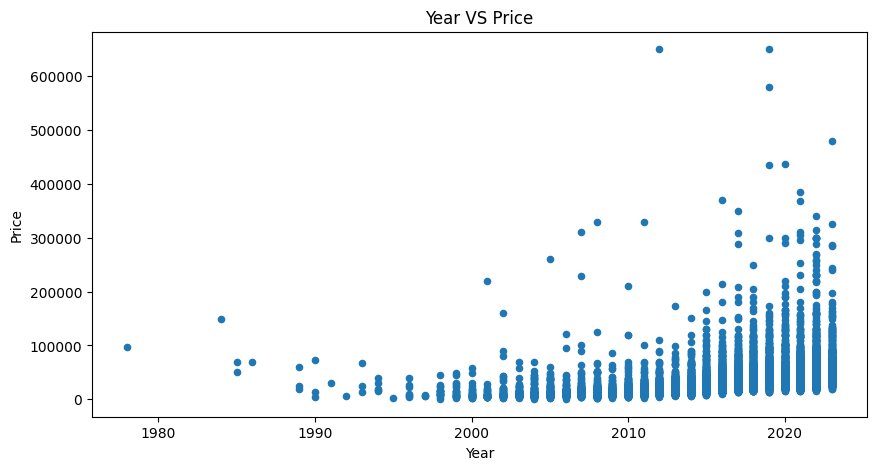

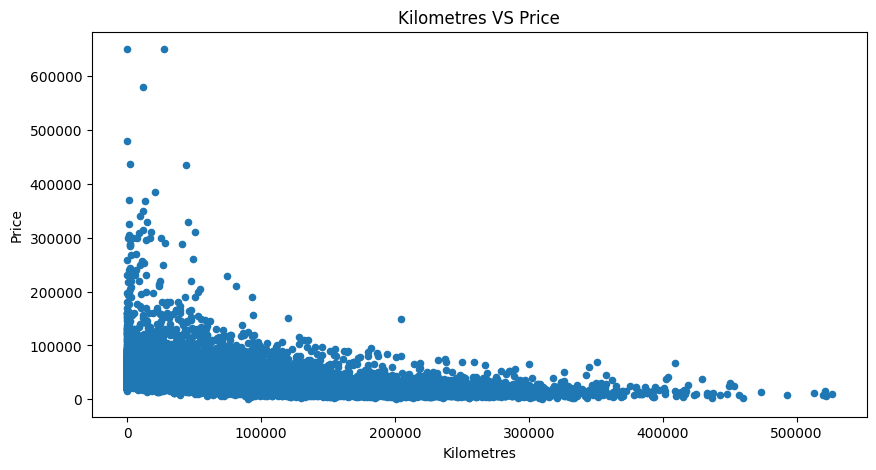

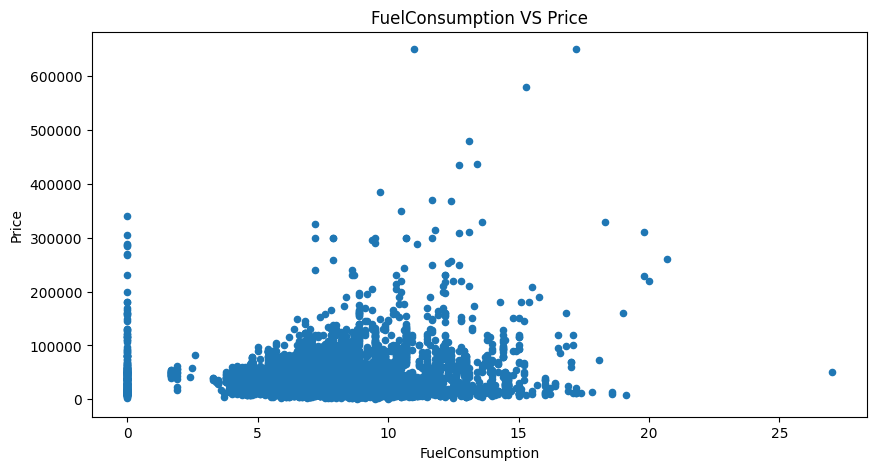

In [ ]:
ContinuousCols=['Year','Kilometres','FuelConsumption']

# Plotting scatter chart for each predictor vs the target variable
plt.figure(figsize=(10,4))
for predictor in ContinuousCols:
    df1.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

# Statistical Feature Selection

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Year','Kilometres','FuelConsumption', 'Price']  # Include 'Price' here
# Creating the correlation matrix
CorrelationData=df1[ContinuousCols].corr()
CorrelationData

,Year,Kilometres,FuelConsumption,Price
Year,1.000000,-0.753759,-0.271743,0.431404
Kilometres,-0.753759,1.000000,0.241302,-0.427941
FuelConsumption,-0.271743,0.241302,1.000000,0.086762
Price,0.431404,-0.427941,0.086762,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.4 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.4 ]

,Price
Year,0.431404
Kilometres,-0.427941
Price,1.000000


## Observations
* Final selected Continuous columns:

* **'Year', 'Kilometres'**

**Relationship exploration: Categorical Vs Continuous -- Box Plots**
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

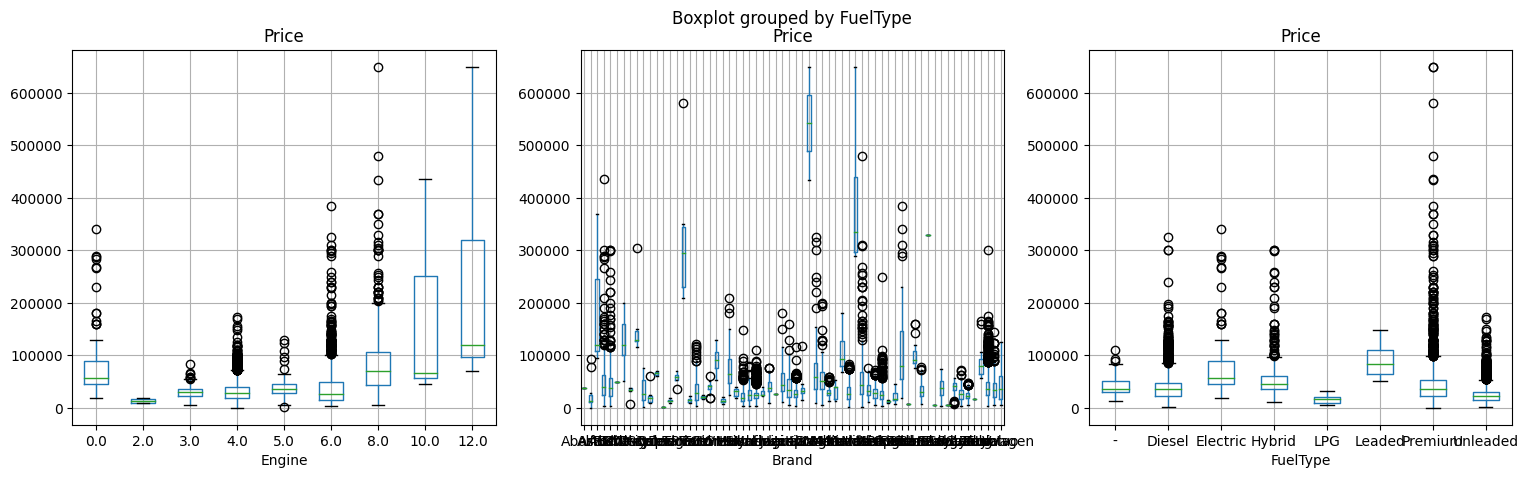

In [ ]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['Engine', 'Brand','FuelType']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df1.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

**(Categorical Vs Continuous) using ANOVA test**

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])


In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Engine', 'Brand','FuelType']
FunctionAnova(inpData=df1,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Engine is correlated with Price | P-Value: 0.0
Brand is correlated with Price | P-Value: 0.0
FuelType is correlated with Price | P-Value: 0.0


##Observations
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable.

* Final selected Categorical columns:

    ['Engine', 'Brand','FuelType']


## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:

**['Engine', 'Year', 'Brand', 'Kilometres', 'FuelType']**


In [ ]:
SelectedColumns=['Engine','Year','Brand','Kilometres','FuelType']

# Selecting final columns
DataForML=df1[SelectedColumns]
DataForML.head()

,Engine,Year,Brand,Kilometres,FuelType
0,4.0,2022.0,Ssangyong,5595.0,Diesel
1,4.0,2022.0,MG,16.0,Premium
2,4.0,2022.0,BMW,8472.0,Premium
3,8.0,2011.0,Mercedes-Benz,136517.0,Premium
4,4.0,2022.0,Renault,1035.0,Unleaded


In [ ]:
 # Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=df1['Price']

# Printing sample rows
DataForML_Numeric.head()

,Engine,Year,Kilometres,Brand_Abarth,Brand_Alfa,Brand_Aston,Brand_Audi,Brand_BMW,Brand_BYD,Brand_Bentley,...,Brand_Volvo,FuelType_-,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_LPG,FuelType_Leaded,FuelType_Premium,FuelType_Unleaded,Price
0,4.0,2022.0,5595.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,51990.0
1,4.0,2022.0,16.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,19990.0
2,4.0,2022.0,8472.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,108988.0
3,8.0,2011.0,136517.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,32990.0
4,4.0,2022.0,1035.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,34990.0


**Machine Learning Model Development:**
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Engine', 'Year', 'Kilometres', 'Brand_Abarth', 'Brand_Alfa',
       'Brand_Aston', 'Brand_Audi', 'Brand_BMW', 'Brand_BYD', 'Brand_Bentley',
       'Brand_Chery', 'Brand_Chevrolet', 'Brand_Chrysler', 'Brand_Citroen',
       'Brand_Cupra', 'Brand_Daewoo', 'Brand_Dodge', 'Brand_FPV',
       'Brand_Ferrari', 'Brand_Fiat', 'Brand_Ford', 'Brand_Foton', 'Brand_GWM',
       'Brand_Genesis', 'Brand_Great', 'Brand_HSV', 'Brand_Haval',
       'Brand_Holden', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Isuzu', 'Brand_Iveco', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Kia',
       'Brand_LDV', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Lexus',
       'Brand_MG', 'Brand_Mahindra', 'Brand_Maserati', 'Brand_Mazda',
       'Brand_McLaren', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Opel', 'Brand_Peugeot',
       'Brand_Porsche', 'Brand_Proton', 'Brand_Ram', 'Brand_Renault',
       'Brand_Rolls-Royce', 'Brand_Saab', 'Brand_Skoda', 'Brand_S

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
# Include all columns generated by get_dummies, excluding the target variable
Predictors = [col for col in DataForML_Numeric.columns if col != TargetVariable]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


**Standardization/Normalization of data**


In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_test

(10185, 75)
(10185,)
(4366, 75)
(4366,)


array([38995., 20999., 11999., ..., 24990., 15999., 16995.])

**Removing nulls from input so that we can go the Multiple Linear Regression Algorithm For ML/AI model building**

In [ ]:
# removing null
# mask = ~np. isnan(y_train)
# X_train = X_train[mask]
# Y_train = y_train[mask]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
y_train

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
y =imputer.fit_transform(y.reshape(-1, 1)).ravel()
print(y)

[ 51990.  19990. 108988. ...  35280.  41888.  65888.]


## Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
# Include all columns generated by get_dummies, excluding the target variable
Predictors = [col for col in DataForML_Numeric.columns if col != TargetVariable]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Impute missing values in target variable (if any)
from sklearn.impute import SimpleImputer
imputer_y = SimpleImputer(strategy='mean')
y_train = imputer_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Impute missing values in predictor variables
imputer_X = SimpleImputer(strategy='mean')
X_train = imputer_X.fit_transform(X_train)
X_test = imputer_X.transform(X_test)  # Use the same imputer fitted on training data

# Impute missing values in the full 'X' for cross-validation
X = imputer_X.fit_transform(X) # Impute on the entire dataset

#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is=True)

(10185, 75)
(10185,)
(4366, 75)
(4366,)
LinearRegression()
R2 Value: 0.6704205031966171

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Kilometres  Brand_Abarth  Brand_Alfa  Brand_Aston  \
0  0.333333  0.822222    0.355184           0.0         0.0          0.0   
1  0.333333  0.888889    0.173850           0.0         0.0          0.0   
2  0.333333  0.733333    0.345267           0.0         0.0          0.0   
3  0.666667  0.822222    0.210593           0.0         0.0          0.0   
4  0.500000  0.911111    0.150142           0.0         0.0          0.0   

   Brand_Audi  Brand_BMW  Brand_BYD  Brand_Bentley  ...  FuelType_-  \
0         0.0        0.0        0.0            0.0  ...         0.0   
1         0.0        0.0        0.0            0.0  ...         0.0   
2         0.0        0.0        0.0            0.0  ...         0.0   
3         0.0        0.0        0.0            0.0  ...         0.0   
4         0.0        1.0        0.0    

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.6483336025773554

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Kilometres  Brand_Abarth  Brand_Alfa  Brand_Aston  \
0  0.333333  0.822222    0.355184           0.0         0.0          0.0   
1  0.333333  0.888889    0.173850           0.0         0.0          0.0   
2  0.333333  0.733333    0.345267           0.0         0.0          0.0   
3  0.666667  0.822222    0.210593           0.0         0.0          0.0   
4  0.500000  0.911111    0.150142           0.0         0.0          0.0   

   Brand_Audi  Brand_BMW  Brand_BYD  Brand_Bentley  ...  FuelType_-  \
0         0.0        0.0        0.0            0.0  ...         0.0   
1         0.0        0.0        0.0            0.0  ...         0.0   
2         0.0        0.0        0.0            0.0  ...         0.0   
3         0.0        0.0        0.0            0.0  ...         0.0   
4         0.0        1.0        0.0  

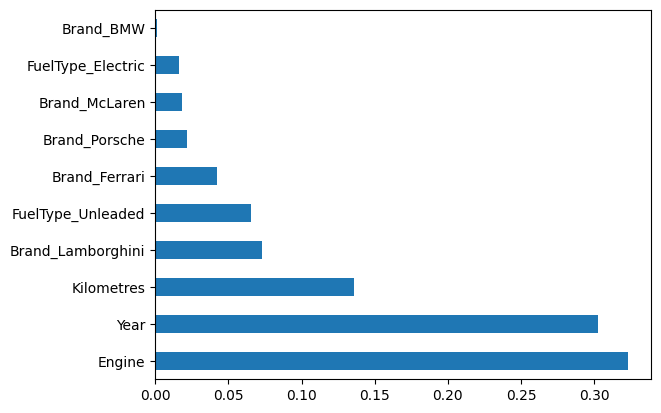

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

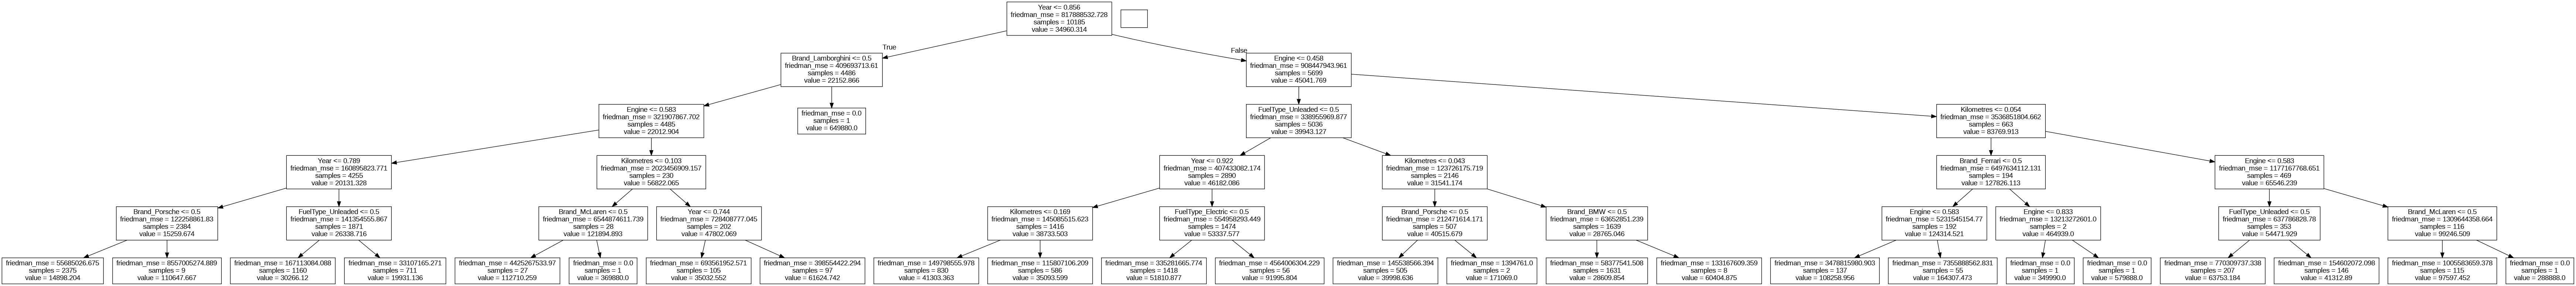

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors) # Remove class_names for regression

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.6561368295332857

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Kilometres  Brand_Abarth  Brand_Alfa  Brand_Aston  \
0  0.333333  0.822222    0.355184           0.0         0.0          0.0   
1  0.333333  0.888889    0.173850           0.0         0.0          0.0   
2  0.333333  0.733333    0.345267           0.0         0.0          0.0   
3  0.666667  0.822222    0.210593           0.0         0.0          0.0   
4  0.500000  0.911111    0.150142           0.0         0.0          0.0   

   Brand_Audi  Brand_BMW  Brand_BYD  Brand_Bentley  ...  FuelType_-  \
0         0.0        0.0        0.0            0.0  ...         0.0   
1         0.0        0.0        0.0            0.0  ...         0.0   
2         0.0        0.0        0.0            0.0  ...         0.0   
3         0.0        0.0        0.0            0.0  ...         0.0   
4         0.0      

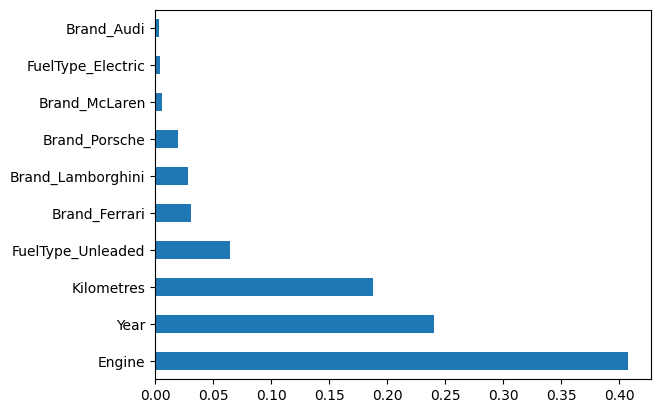

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

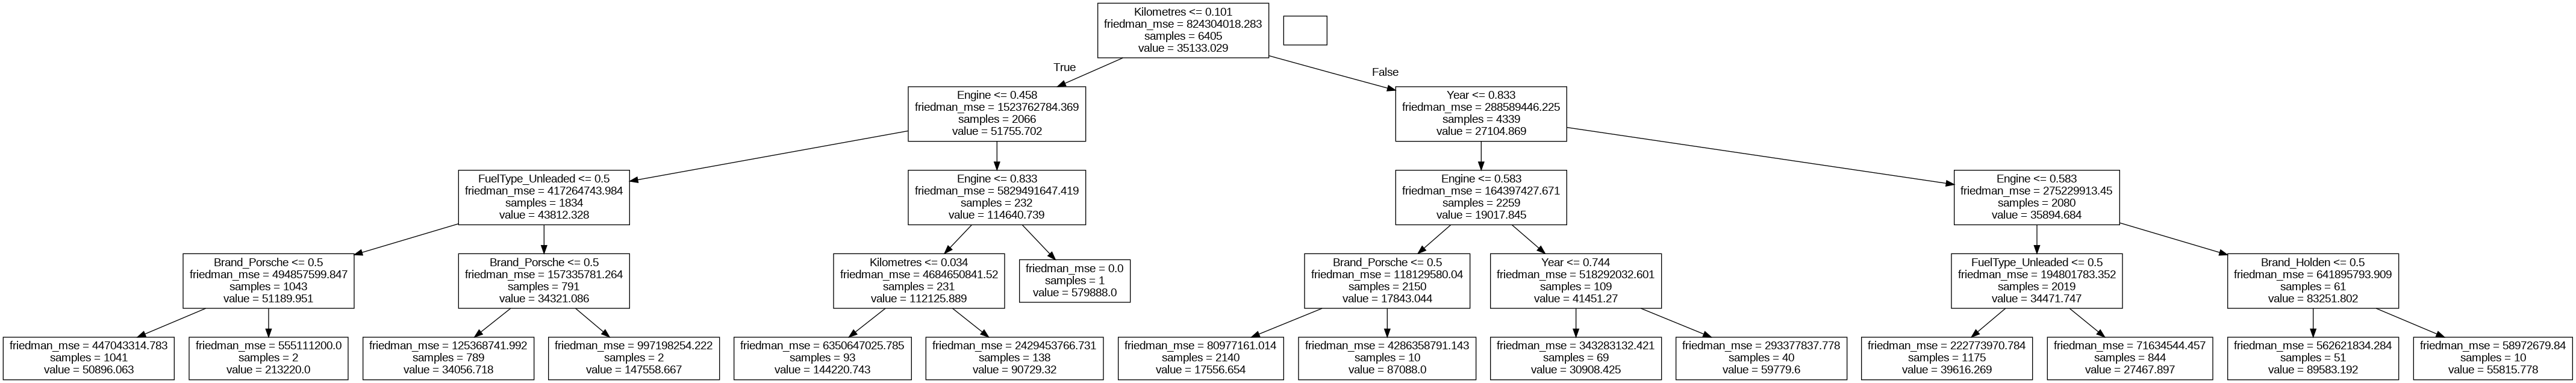

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
# Remove class_names for regression tasks
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.5607408167016039

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Kilometres  Brand_Abarth  Brand_Alfa  Brand_Aston  \
0  0.333333  0.822222    0.355184           0.0         0.0          0.0   
1  0.333333  0.888889    0.173850           0.0         0.0          0.0   
2  0.333333  0.733333    0.345267           0.0         0.0          0.0   
3  0.666667  0.822222    0.210593           0.0         0.0          0.0   
4  0.500000  0.911111    0.150142           0.0         0.0          0.0   

   Brand_Audi  Brand_BMW  Brand_BYD  Brand_Bentley  ...  FuelType_-  \
0         0.0        0.0        0.0            0.0  ...         0.0   
1         0.0        0.0        0.0            0.0  ...         0.0   
2         0.0        0.0        0.0            0.0  ...         0.0   
3         0.0        0.0        0.0            0.0  ...         0.0   
4         0.0        1.0        0.0            0.0  ...         0.0   

   FuelType_Diesel  FuelTy

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [47.38871232 45.0544231  54.55532831 39.7982217  46.46934274 56.00060841
 51.99771945 50.7162144  54.25636277 27.33324027]

Final Average Accuracy of the model: 47.36


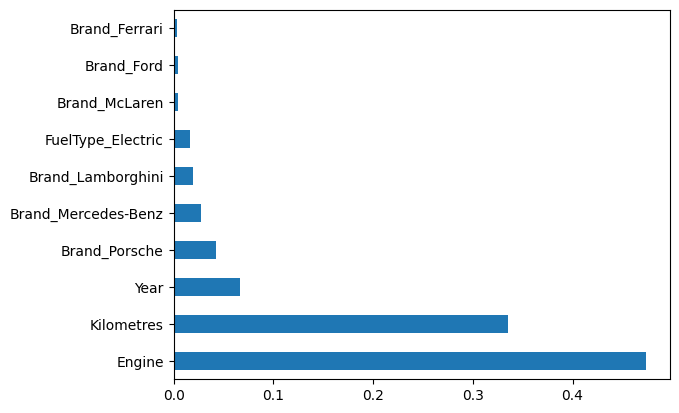

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:26:32] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.8672553809450674

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Kilometres  Brand_Abarth  Brand_Alfa  Brand_Aston  \
0  0.333333  0.822222    0.355184           0.0         0.0          0.0   
1  0.333333  0.888889    0.173850           0.0         0.0          0.0   
2  0.333333  0.733333    0.345267           0.0         0.0          0.0   
3  0.666667  0.822222    0.210593           0.0         0.0          0.0   
4  0.500000  0.911111    0.150142           0.0         0.0          0.0   

   Brand_Audi  Brand_BMW  Brand_BYD  Brand_Bentley  ...  FuelType_-  \
0         0.0        0.0        0.0            0.0  ...         0.0   
1         0.0        0.0        0.0            0.0  ...         0.0   
2         0.0        0.0        0.0            0.0  ...         0.0   
3         0.0        0.0        0.0            0.0  ...         0.0   
4         0.0        1.0        0.0            0.0  ...         0.0   

   FuelType_Diesel  FuelTy

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:26:33] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:26:35] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:26:36] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:26:37] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [77.08615238 76.86380272 77.75094349 78.10298586 80.49758772 79.41995596
 79.76780492 78.63894689 78.75004795 67.86608341]

Final Average Accuracy of the model: 77.47


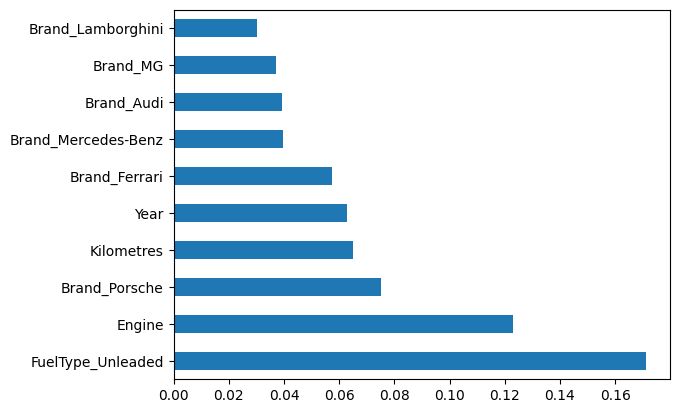

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

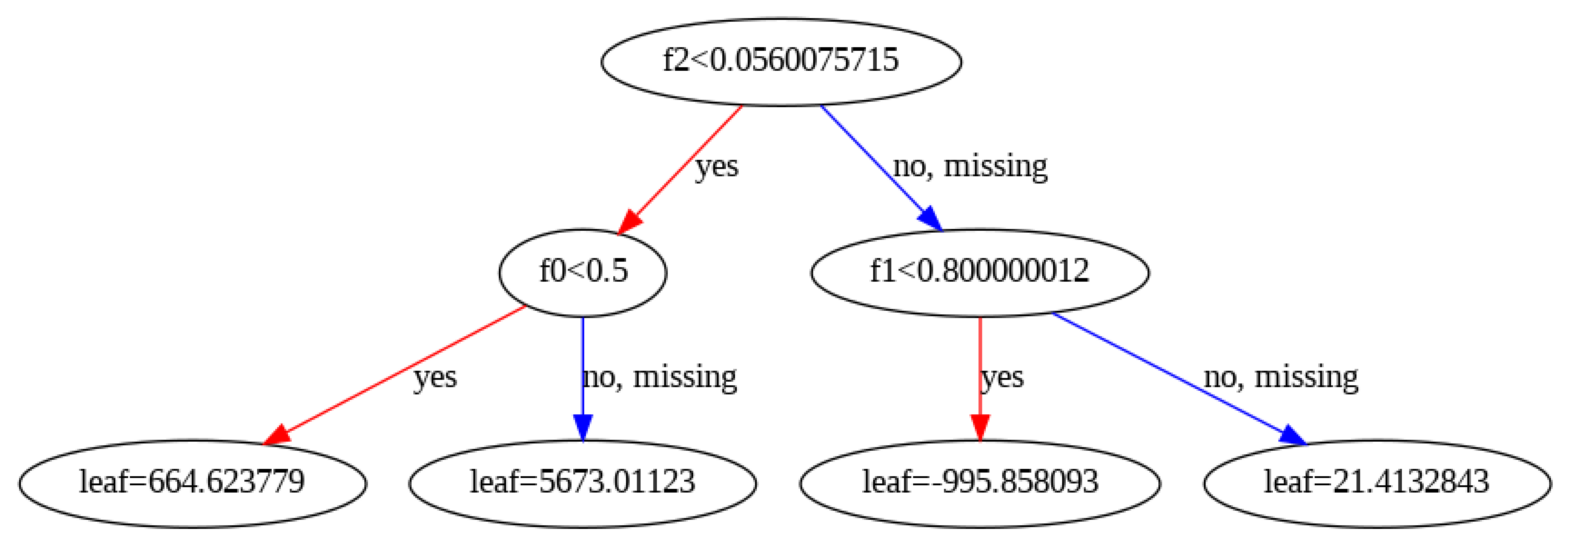

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8918307504644327

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Kilometres  Brand_Abarth  Brand_Alfa  Brand_Aston  \
0  0.333333  0.822222    0.355184           0.0         0.0          0.0   
1  0.333333  0.888889    0.173850           0.0         0.0          0.0   
2  0.333333  0.733333    0.345267           0.0         0.0          0.0   
3  0.666667  0.822222    0.210593           0.0         0.0          0.0   
4  0.500000  0.911111    0.150142           0.0         0.0          0.0   

   Brand_Audi  Brand_BMW  Brand_BYD  Brand_Bentley  ...  FuelType_-  \
0         0.0        0.0        0.0            0.0  ...         0.0   
1         0.0        0.0        0.0            0.0  ...         0.0   
2         0.0        0.0        0.0            0.0  ...         0.0   
3         0.0        0.0        0.0            0.0  ...         0.0   
4         0.0        1.0        0.0            0.0  ...        

# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: -0.015603007105201794

##### Model Validation and Accuracy Calculations ##########
     Engine      Year  Kilometres  Brand_Abarth  Brand_Alfa  Brand_Aston  \
0  0.333333  0.822222    0.355184           0.0         0.0          0.0   
1  0.333333  0.888889    0.173850           0.0         0.0          0.0   
2  0.333333  0.733333    0.345267           0.0         0.0          0.0   
3  0.666667  0.822222    0.210593           0.0         0.0          0.0   
4  0.500000  0.911111    0.150142           0.0         0.0          0.0   

   Brand_Audi  Brand_BMW  Brand_BYD  Brand_Bentley  ...  FuelType_-  \
0         0.0        0.0        0.0            0.0  ...         0.0   
1         0.0        0.0        0.0            0.0  ...         0.0   
2         0.0        0.0        0.0            0.0  ...         0.0   
3         0.0        0.0        0.0            0.0  ...         0.0   
4         0.0        1.0        0.0            0.0  ...         0.0   

 

# Model Deployment
* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.
* I am choosing XGboost as the final model it has the 77.47% accuracy!

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Engine', 'Year', 'Kilometres', 'Brand_Abarth', 'Brand_Alfa',
       'Brand_Aston', 'Brand_Audi', 'Brand_BMW', 'Brand_BYD', 'Brand_Bentley',
       'Brand_Chery', 'Brand_Chevrolet', 'Brand_Chrysler', 'Brand_Citroen',
       'Brand_Cupra', 'Brand_Daewoo', 'Brand_Dodge', 'Brand_FPV',
       'Brand_Ferrari', 'Brand_Fiat', 'Brand_Ford', 'Brand_Foton', 'Brand_GWM',
       'Brand_Genesis', 'Brand_Great', 'Brand_HSV', 'Brand_Haval',
       'Brand_Holden', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Isuzu', 'Brand_Iveco', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Kia',
       'Brand_LDV', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Lexus',
       'Brand_MG', 'Brand_Mahindra', 'Brand_Maserati', 'Brand_Mazda',
       'Brand_McLaren', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Opel', 'Brand_Peugeot',
       'Brand_Porsche', 'Brand_Proton', 'Brand_Ram', 'Brand_Renault',
       'Brand_Rolls-Royce', 'Brand_Saab', 'Brand_Skoda', 'Brand_Smart',
       'Brand_Ssangyong', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Tata',
       'Brand_Tesla', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'FuelType_-', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_Hybrid',
       'FuelType_LPG', 'FuelType_Leaded', 'FuelType_Premium',
       'FuelType_Unleaded']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(14551, 75)
(14551,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:31:41] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:31:42] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:31:43] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:31:44] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [76.91456203 76.64598377 77.8812093  78.32263618 80.44698098 79.65988053
 79.83741234 78.72532829 79.21783986 66.18464632]

Final Average Accuracy of the model: 77.38


#  Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:31:56] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


#Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


# Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('/content/drive/MyDrive/DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Engine', 'Year', 'Kilometres', 'Brand_Abarth', 'Brand_Alfa',
       'Brand_Aston', 'Brand_Audi', 'Brand_BMW', 'Brand_BYD', 'Brand_Bentley',
       'Brand_Chery', 'Brand_Chevrolet', 'Brand_Chrysler', 'Brand_Citroen',
       'Brand_Cupra', 'Brand_Daewoo', 'Brand_Dodge', 'Brand_FPV',
       'Brand_Ferrari', 'Brand_Fiat', 'Brand_Ford', 'Brand_Foton', 'Brand_GWM',
       'Brand_Genesis', 'Brand_Great', 'Brand_HSV', 'Brand_Haval',
       'Brand_Holden', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Isuzu', 'Brand_Iveco', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Kia',
       'Brand_LDV', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Lexus',
       'Brand_MG', 'Brand_Mahindra', 'Brand_Maserati', 'Brand_Mazda',
       'Brand_McLaren', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Opel', 'Brand_Peugeot',
       'Brand_Porsche', 'Brand_Proton', 'Brand_Ram', 'Brand_Renault',
       'Brand_Rolls-Royce', 'Brand_Saab', 'Brand_Skoda', 'Brand_Smart',
       'Brand_Ssangyong', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Tata',
       'Brand_Tesla', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'FuelType_-', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_Hybrid',
       'FuelType_LPG', 'FuelType_Leaded', 'FuelType_Premium',
       'FuelType_Unleaded']


    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('/content/drive/MyDrive/Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Calling the function for some new data

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[4.98,6.575,15.3],[4.98,3.2,10.3]],columns=['Engine', 'Year', 'Kilometres']) # Only include columns that exist in the data

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Engine   Year  Kilometres
0    4.98  6.575        15.3
1    4.98  3.200        10.3


,Prediction
0,104564.4375
1,104564.4375


# Deploying the model with few parameters
# Function for predictions API

In [ ]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_Engine , inp_Year, inp_Kilometres):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Engine , inp_Year, inp_Kilometres]],
     columns=['Engine', 'Year', 'Kilometres'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(inp_Engine=4.98,
                           inp_Year=6.5,
                           inp_Kilometres=15.3
                             )

'{"Prediction":{"0":104564.4375}}'

In [ ]:
!pip install flask

# Creating Flask API

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Engine_value = float(request.args.get('Engine'))
        Year_value=float(request.args.get('Year'))
        Kilometre_value=float(request.args.get('Kilometres'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_Engine=Engine_value,
                                                       inp_Year=Year_value,
                                                       inp_Kilometres=Kilometre_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


# Desktop App deployment: Tkinter package


1.  Will not work on Google Colab.
2.  Need to use PyCharm to run this code.


In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

class AustralianVehicalPricePrediction:
    def __init__(self, master):
        self.master = master
        self.master.title('Australian Vehicle Price Prediction')
        self.data = pd.read_csv('Australian Vehicle Prices (1).csv')

        # Convert categorical variables into numerical variables
        categorical_cols = self.data.select_dtypes(include=['object']).columns
        self.le = {}
        for col in categorical_cols:
            le = LabelEncoder()
            self.data[col] = le.fit_transform(self.data[col])
            self.le[col] = le

        self.entries = []

        self.X = self.data[['Engine', 'Year', 'Kilometres', 'FuelType', 'Brand']].values
        self.y = self.data['Price'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        columns = ['Engine', 'Year', 'Kilometres', 'FuelType', 'Brand']
        for i, column in enumerate(columns):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            if column in ['Year', 'FuelType', 'Brand']:
                entry = tk.Entry(self.master)
                entry.grid(row=i, column=1)
            else:
                if column == 'Engine':
                    slider = tk.Scale(self.master, from_=0, to=20, orient="horizontal", resolution=2)
                elif column == 'Kilometres':
                    slider = tk.Scale(self.master, from_=0, to=200000, orient="horizontal", resolution=1000)
                else:
                    slider = tk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal")
                slider.grid(row=i, column=1)
                current_val_label = tk.Label(self.master, text='0.0')
                current_val_label.grid(row=i, column=2)
                def update_label(slider, label):
                    def inner(val):
                        label.config(text=f'{slider.get():.2f}')
                    return inner
                slider.config(command=update_label(slider, current_val_label))
            self.entries.append(entry if column in ['Year', 'FuelType', 'Brand'] else slider)

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(columns), columnspan=3)

    def predict_price(self):
        inputs = []
        columns = ['Engine', 'Year', 'Kilometres', 'FuelType', 'Brand']
        for i, entry in enumerate(self.entries):
            column = columns[i]
            if isinstance(entry, tk.Entry):
                if column in self.le:
                    inputs.append(self.le[column].transform([entry.get()])[0])
                else:
                    inputs.append(float(entry.get()))
            else:
                inputs.append(float(entry.get()))
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted vehicle price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = AustralianVehicalPricePrediction(root)
    root.mainloop()